In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [98]:
# total number of actions
df.shape

(8188, 4)

In [99]:
# number of unique users
df.nunique()

timestamp    8188
id           6328
group           2
action          2
dtype: int64

In [100]:
# size of control group and experiment group
df.groupby('group').nunique()

,timestamp,id,group,action
group,,,,
control,4264,3332,1,2
experiment,3924,2996,1,2


### 2. How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [101]:
# duration of this experiment
df.timestamp.min(),df.timestamp.max()

('2016-09-24 17:42:27.839496', '2017-01-18 10:24:08.629327')

### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [102]:
# action types in this experiment
df.action.unique()

array(['view', 'click'], dtype=object)

### 4. Why would we use click through rate instead of number of clicks to compare the performances of control and experiment pages?
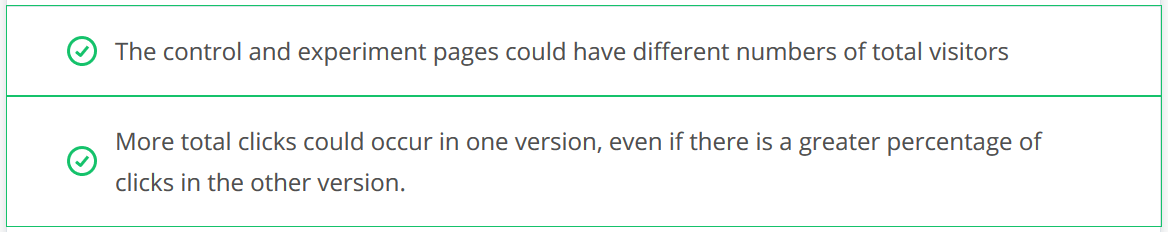


### 5. Define the click through rate (CTR) for this experiment.

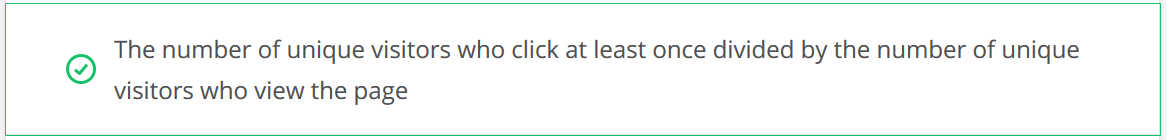

### 6. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

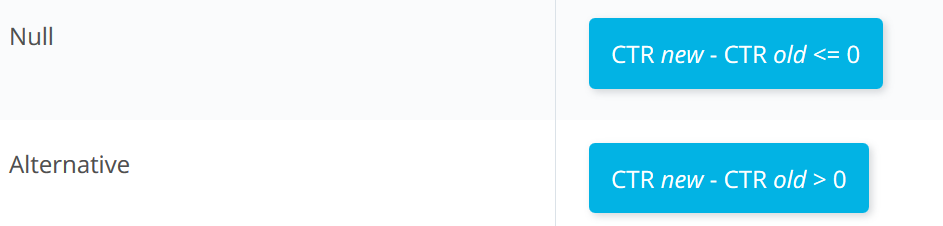

Let's recap the steps we took to analyze the results of this A/B test.

1. We computed **the observed difference** between the metric, click through rate, for the control and experiment group.
2. We simulated the **sampling distribution** for the difference in proportions (or difference in click through rates).
3. We used this sampling distribution to simulate **the distribution under the null hypothesis**, by creating a random normal distribution centered at 0 with the same spread and size.
4. We computed the **p-value** by finding the proportion of values in the null distribution that were greater than our observed difference.
5. We used this p-value to determine the **statistical significance** of our observed difference.



In [103]:
#computed the observed difference 
control_df = df.query("group=='control'")
control_ctr = control_df.query('action=="click"').id.nunique()/control_df.query('action=="view"').id.nunique()

experiment_df = df.query("group=='experiment'")
experiment_ctr = experiment_df.query('action=="click"').id.nunique()/experiment_df.query('action=="view"').id.nunique()

In [104]:
obs_diff = experiment_ctr-control_ctr
print(obs_diff)

0.030034443684015644


In [105]:
#using bootstrap to simulate the sampling distribution 
diffs = []
for i in range(10000):
    b_samp = df.sample(df.shape[0], replace = True)
    
    #computed the observed difference  CTR: # clicks by unique users / # views by unique users
    control_df = b_samp.query("group=='control'")
    control_ctr = control_df.query('action=="click"').id.nunique()/control_df.query('action=="view"').id.nunique()

    experiment_df = b_samp.query("group=='experiment'")
    experiment_ctr = experiment_df.query('action=="click"').id.nunique()/experiment_df.query('action=="view"').id.nunique()
    
    diffs.append(experiment_ctr-control_ctr)

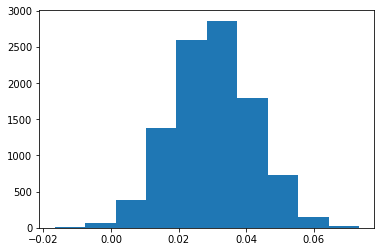

In [106]:
diffs = np.array(diffs)
plt.hist(diffs);

In [107]:
#to simulate the distribution under the null hypothesis
null_values = np.random.normal(0,np.std(diffs),10000 )

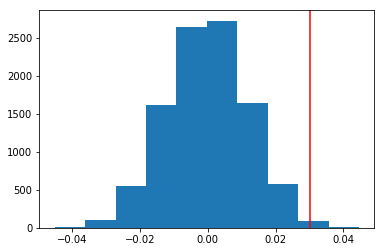

In [108]:
plt.hist(null_values);
plt.axvline(obs_diff, color='red')

In [109]:
#computed the p-value
p_value = (null_values> obs_diff).mean()
print(p_value)

0.0055


In [110]:
#statistical significance
#the p-value is less than your Type I error threshold, then you have evidence to reject the null and choose the alternative. Otherwise, you fail to reject the null hypothesis.
print(p_value< 0.05) #then we reject the null

True


The Bonferroni Correction is one way we could handle experiments with multiple tests, or metrics in this case. To compute the new bonferroni correct alpha value, we need to divide the original alpha value by the number of tests.If our original alpha value was 0.05, what would be our new, Bonferroni corrected alpha value, considering we had four tests?

In [111]:
0.05/4

0.0125

In [112]:
print(p_value< (0.05/4))

True
